# week2-homework - Nagy Dániel Zoltán

Note: Vesztettem 0.2 pontot, utolsó feladat valószínűleg nem jó

## A few words about modules and functions
- Module: a group of highly related classes/functions. (Usually a something.py file) 
    - import mymodule - load the module
    - usage: mymodule.myfunction(); mymodule.myclass()
- from mymodule import myclass – load the myclass
    - Usage of class defined in the module: myclass()
- from mymodule import * - load everything
- the difference is the namespace (like in c++)
- modules used here:
    - the SeqIO module of Biopython helps to read sequences easily
    - numpy module can do the math
    - matplotlib makes nice plots, similar to Matlab
- functions can be implemented with the "def" command using only indenting (tabs) to mark its beginning and end
- functions can be called later by their name, giving them the appropriate parameters


## About NumPy
- Scientific module for python: (https://numpy.org/devdocs/user/quickstart.html)
Main type is the multidimensional array
- Table of elements of same type (usually numbers). Basically matrices
    - Axes: „dimensions”
    - Rank: number of dimensions

# Dot plot generating code

In [5]:
from Bio import SeqIO
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy



def dotplot(seq1name, seq2name=None,  cutoff=15, wordsize=20, isreversecompl=False):
    '''
    Draw a dotplot of two sequences. If isreversecompl=True, then 
    the first sequence is compared to it's reverse complement.
    
    :param seq1name:       path to the first sequence. 
                           The sequence file is expected to be a valid fasta file. 
    :param seq2name:       path to the second sequence. 
                           The sequence file is expected to be a valid fasta file. 
    :param cutoff:         the treshold defining whether a dot should be plotted
    :param wordsize:       window size
    :param isreversecompl: If True, then the function plots the sequence 1 against
                           it's reverse complement. Default is False. Note if it is
                           False, then seqname2 is ignored.  
    '''
    # scoring scheme
    match_score = 5
    mis_match_score = -4 

    # read in the fasta files
    for seq1obj in SeqIO.parse(seq1name, "fasta"):
        print(seq1obj.id, ": ", seq1obj.seq)
    
    if not isreversecompl:
        for seq2obj in SeqIO.parse(seq2name, "fasta"):
            print(seq2obj.id, ": ", seq2obj.seq)

    if isreversecompl: # make the reverse complement of the sequence to find stem loops
        seq2obj=deepcopy(seq1obj)
        seq2obj.seq=seq1obj.seq.reverse_complement()
        seq2obj.id=seq1obj.id+' reverse complement'
        print(seq2obj.id, ": ", seq2obj.seq)

    seq1=seq1obj.seq.lower()
    seq2=seq2obj.seq.lower()
    nucleotide_list=('c', 'g', 't', 'a')
    matrix=np.zeros((len(seq1), len(seq2)), dtype=int) # store the dots here
    matrix2=np.zeros((len(seq1), len(seq2)), dtype=int) # store the match values here
    for i in range(0,len(seq1)-wordsize+1):
        for j in range(0, len(seq2)-wordsize+1):
            score=0
            for k in range(0, wordsize):
                if seq1[i+k]==seq2[j+k] and seq1[i+k] in nucleotide_list and seq2[j+k] in nucleotide_list: #if there is a match and it is a nucleotide
                    score+=match_score # simplest scoring scheme: match=+1 mismatch=0
                else:
                    score+=mis_match_score
            if score >= cutoff:
                matrix[i+int(wordsize/2),j+int(wordsize/2)]=1 # dot in the middle of the word if the score is not lower then the cut-off score
            matrix2[i + int(wordsize / 2), j + int(wordsize / 2)] = score # store the scores

    # visualization:
    # dotplot itself
    plt.figure(1)
    plt.pcolor(matrix, cmap=plt.cm.binary)
    plt.xlabel(seq2obj.id)
    plt.ylabel(seq1obj.id)
    plt.title('Dotplot: cut-off score= ' + str(cutoff) + ', world size=' + str(wordsize))
    plt.colorbar()
    #heatmap
    plt.figure(2)
    plt.pcolor(matrix2)
    plt.xlabel(seq2obj.id)
    plt.ylabel(seq1obj.id)
    plt.title('Dotplot: cut-off score= ' + str(cutoff) + ', world size=' + str(wordsize))
    plt.colorbar()

    plt.show()


In [6]:
sequence_1 = 'fasta_files/hw3_seq1.fasta'
sequence_2 = 'fasta_files/hw3_seq2.fasta'
sequence_3 = 'fasta_files/hw3_seq3.fasta'
sequence_4 = 'fasta_files/hw3_seq4.fasta'

### Using the dotplot function:
- you can run the program by calling the function
    - the 5th parameter is TRUE if we search stem loops, FALSE otherwise (default is FALSE)

sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG
sequence_2 :  AAGAAGGCCAAGCTTGCCTGCCCTGCATTTTATCAAAGGAGCAGGGAAGAAGGAATCATCGAGGCATGGGGGTCCACACTGCAATGTTTTTGTGGAACATGAAGCCCTTCAGCGGCCAGTAGCATCTGACTTTGAGCCTCAGGGTCTGAGTGAAGCCGCTCGTTGGAACTCCAAGGAAAACCTTCTCGCTGGACCCAGTGAAAATGACCCCAACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACACTCTAAGCATAACTAAAGGTGAAAAGCTCCGGGTCTTAGGCTATAATGAAGCCCAAACCAAAAATGGCCAAGGCTGGGTCCCAAGCAACTACATCACGCCAGTCAAC


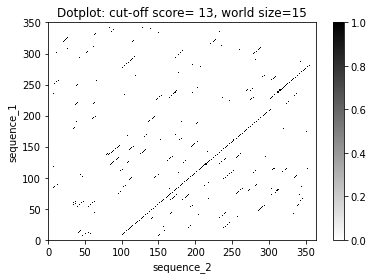

In [7]:
#exampe for the dotplot - comparing the two sequence against eachother
dotplot(sequence_1, sequence_2, cutoff=13, wordsize=15) #change parameters

sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG
sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG


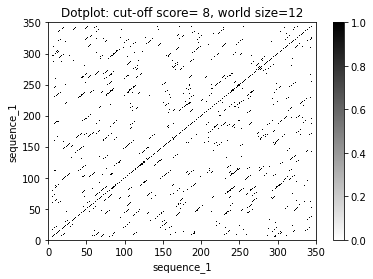

In [8]:
#example for comparing the sequence to itself (i.e. finding repeats)
dotplot(sequence_1, sequence_1, cutoff=8, wordsize=12, isreversecompl=False)

sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG
sequence_1 reverse complement :  CAGATACTCAGCAGCATTCCGAGATACAGGGCCATGATACCAGGAATGTTTCTCCAGGCTGTTGACGGGGGTGATGTAGTTGCTTGGGACCCATCCTTGGCCATTTTTCGTTTGGGCTTCACACCATTCCCCATTGTGATTATAACCCAAGACCCGGAGCTTTTCACCTTTAGTGATGCTGAGAGTGTTATCTCCACTGGCCACAAAATCATAGAGTGCCACAAAAAGGTTGGGGTCATTTTCACTGGGCCCAGCAAGAAGGTTTTCCTTGGAGTTCCATCGAGCTGCTTCGCTGAGACCCTGGGGCTCAAAGTCAGATGCCACTGGCCTCTGCAGGGCTTCTTCCAGGT


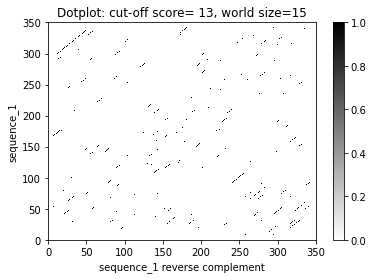

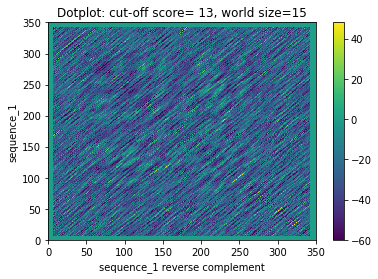

In [9]:
#example for comparing the sequence to its reverse complement 
dotplot(sequence_1, None, cutoff=13, wordsize=15, isreversecompl=True)

# Exercise: Use dotplot function and the sequences (sequence_1, sequence_2, sequence_3, sequence_4) to answer the following questions:

### HINT: try to use the heat map for finding 'the optimal' tresholds
### HINT: modify the window size, and cut-off score parameters to get plots with all the important features, but with minimal noise
### SUBMIT: 
- your python code with the parameters, 
- the generated plots,
- short explanation of your results (in markdown cells)
  

### 1.: Which are the 2 most similar sequences and why?

###  1. Answer:

sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG
sequence_2 :  AAGAAGGCCAAGCTTGCCTGCCCTGCATTTTATCAAAGGAGCAGGGAAGAAGGAATCATCGAGGCATGGGGGTCCACACTGCAATGTTTTTGTGGAACATGAAGCCCTTCAGCGGCCAGTAGCATCTGACTTTGAGCCTCAGGGTCTGAGTGAAGCCGCTCGTTGGAACTCCAAGGAAAACCTTCTCGCTGGACCCAGTGAAAATGACCCCAACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACACTCTAAGCATAACTAAAGGTGAAAAGCTCCGGGTCTTAGGCTATAATGAAGCCCAAACCAAAAATGGCCAAGGCTGGGTCCCAAGCAACTACATCACGCCAGTCAAC


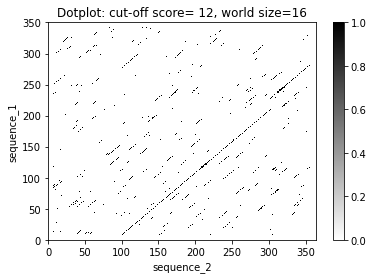

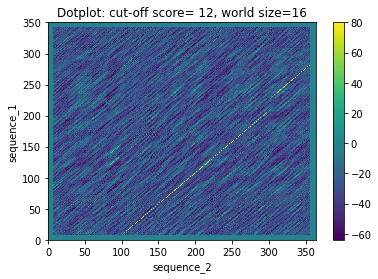

In [10]:
dotplot(sequence_1, sequence_2, cutoff=12, wordsize=16, isreversecompl=False)

sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG
sequence_3 :  AGCAGGAGAAGCGCCTTACCTGGCCCCGCAGGTCCTACTCCCCCCGGAGTTTTGAGGATTGCGGAGGCGGCTATACCCCGGACGCCTTACCTGGCCCCGCATGCAGCTCCAATGAGAACCTCACCTCCAGGGTGAGGTTCTCATTCGAGGAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTACCTGGCCCCGCACCTCGCAGAACT


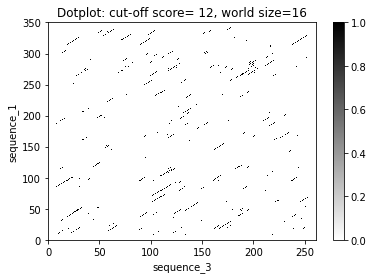

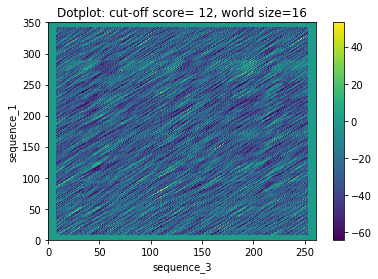

In [11]:
dotplot(sequence_1, sequence_3, cutoff=12, wordsize=16, isreversecompl=False)

sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG
sequence_4 :  CAGAGGCCAGTGGCATCTGACTTTGAGCAACCAGGGTCTCAGCGAAGCAGCTCGGTGGAACTCCAAGGAAACCTTCTTCCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTGTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTCCCTGGCCCCGCACCACGCAG


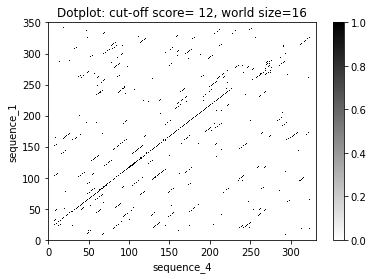

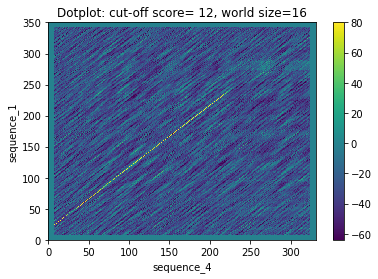

In [12]:
dotplot(sequence_1, sequence_4, cutoff=12, wordsize=16, isreversecompl=False)

In [13]:
dotplot(sequence_2, sequence_3, cutoff=12, wordsize=16, isreversecompl=False)

sequence_2 :  AAGAAGGCCAAGCTTGCCTGCCCTGCATTTTATCAAAGGAGCAGGGAAGAAGGAATCATCGAGGCATGGGGGTCCACACTGCAATGTTTTTGTGGAACATGAAGCCCTTCAGCGGCCAGTAGCATCTGACTTTGAGCCTCAGGGTCTGAGTGAAGCCGCTCGTTGGAACTCCAAGGAAAACCTTCTCGCTGGACCCAGTGAAAATGACCCCAACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACACTCTAAGCATAACTAAAGGTGAAAAGCTCCGGGTCTTAGGCTATAATGAAGCCCAAACCAAAAATGGCCAAGGCTGGGTCCCAAGCAACTACATCACGCCAGTCAAC
sequence_3 :  AGCAGGAGAAGCGCCTTACCTGGCCCCGCAGGTCCTACTCCCCCCGGAGTTTTGAGGATTGCGGAGGCGGCTATACCCCGGACGCCTTACCTGGCCCCGCATGCAGCTCCAATGAGAACCTCACCTCCAGGGTGAGGTTCTCATTCGAGGAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTACCTGGCCCCGCACCTCGCAGAACT


In [14]:
dotplot(sequence_2, sequence_4, cutoff=12, wordsize=16, isreversecompl=False)

sequence_2 :  AAGAAGGCCAAGCTTGCCTGCCCTGCATTTTATCAAAGGAGCAGGGAAGAAGGAATCATCGAGGCATGGGGGTCCACACTGCAATGTTTTTGTGGAACATGAAGCCCTTCAGCGGCCAGTAGCATCTGACTTTGAGCCTCAGGGTCTGAGTGAAGCCGCTCGTTGGAACTCCAAGGAAAACCTTCTCGCTGGACCCAGTGAAAATGACCCCAACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACACTCTAAGCATAACTAAAGGTGAAAAGCTCCGGGTCTTAGGCTATAATGAAGCCCAAACCAAAAATGGCCAAGGCTGGGTCCCAAGCAACTACATCACGCCAGTCAAC
sequence_4 :  CAGAGGCCAGTGGCATCTGACTTTGAGCAACCAGGGTCTCAGCGAAGCAGCTCGGTGGAACTCCAAGGAAACCTTCTTCCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTGTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTCCCTGGCCCCGCACCACGCAG


sequence_3 :  AGCAGGAGAAGCGCCTTACCTGGCCCCGCAGGTCCTACTCCCCCCGGAGTTTTGAGGATTGCGGAGGCGGCTATACCCCGGACGCCTTACCTGGCCCCGCATGCAGCTCCAATGAGAACCTCACCTCCAGGGTGAGGTTCTCATTCGAGGAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTACCTGGCCCCGCACCTCGCAGAACT
sequence_4 :  CAGAGGCCAGTGGCATCTGACTTTGAGCAACCAGGGTCTCAGCGAAGCAGCTCGGTGGAACTCCAAGGAAACCTTCTTCCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTGTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTCCCTGGCCCCGCACCACGCAG


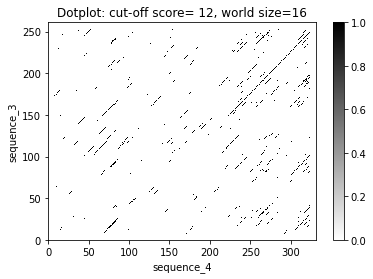

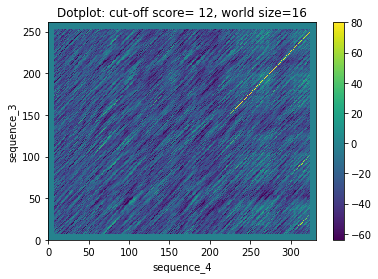

In [15]:
dotplot(sequence_3, sequence_4, cutoff=12, wordsize=16, isreversecompl=False)

### Solution

Two sequence's similarity depends on the long lines on the dotplot. I compared all the 4 sequences with each other, and then observed the long diagonal yellow lines on the heatmap. Since sequence 1-3 and 2-3 are quite folded, this means they are not very similar. On the other hand, all the other comparisons contain longer line pieces, so they have better matches. I think 1 and 4 has the most in common, but 1 and 2 are also close. 2 and 4 seems also related, which prooves that these 3 sequences have many common pieces.
##### My answer is sequence 1 and 4.

### 2.: Are there any repeated regions regions in the sequences? In which one(s)? Where are these regions, how many repeats are there?

###  2. Answer:

sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG
sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG


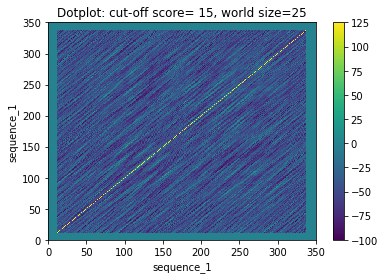

In [16]:
dotplot(sequence_1, sequence_1, cutoff=15, wordsize=25, isreversecompl=False)

In sequence one there are many shorter repeted regions, parallel to the diagonal line, I count about 11 of them (excluding the shorter segments). For counting we have to consider only on half of the image (e.g.: the upper corner), because the sequences are compared with themselves, therefore the dot plot is mirrored. From these 11 the longer ones are at:
- 100-110 with 20-30
- 120-130 with 90-100
- 140-150 with 125-135
- 150-160 with 95-105

sequence_2 :  AAGAAGGCCAAGCTTGCCTGCCCTGCATTTTATCAAAGGAGCAGGGAAGAAGGAATCATCGAGGCATGGGGGTCCACACTGCAATGTTTTTGTGGAACATGAAGCCCTTCAGCGGCCAGTAGCATCTGACTTTGAGCCTCAGGGTCTGAGTGAAGCCGCTCGTTGGAACTCCAAGGAAAACCTTCTCGCTGGACCCAGTGAAAATGACCCCAACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACACTCTAAGCATAACTAAAGGTGAAAAGCTCCGGGTCTTAGGCTATAATGAAGCCCAAACCAAAAATGGCCAAGGCTGGGTCCCAAGCAACTACATCACGCCAGTCAAC
sequence_2 :  AAGAAGGCCAAGCTTGCCTGCCCTGCATTTTATCAAAGGAGCAGGGAAGAAGGAATCATCGAGGCATGGGGGTCCACACTGCAATGTTTTTGTGGAACATGAAGCCCTTCAGCGGCCAGTAGCATCTGACTTTGAGCCTCAGGGTCTGAGTGAAGCCGCTCGTTGGAACTCCAAGGAAAACCTTCTCGCTGGACCCAGTGAAAATGACCCCAACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACACTCTAAGCATAACTAAAGGTGAAAAGCTCCGGGTCTTAGGCTATAATGAAGCCCAAACCAAAAATGGCCAAGGCTGGGTCCCAAGCAACTACATCACGCCAGTCAAC


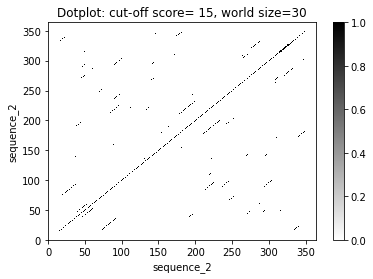

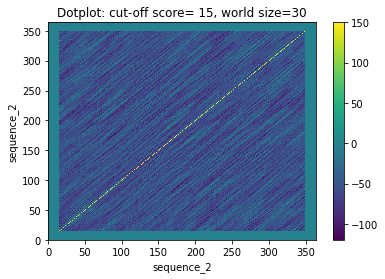

In [17]:
dotplot(sequence_2, sequence_2, cutoff=15, wordsize=30, isreversecompl=False)

In this sequence there are also many shorter repeats, but not many with mantionable length. The longest ones are around 10 nucleotides. 

sequence_3 :  AGCAGGAGAAGCGCCTTACCTGGCCCCGCAGGTCCTACTCCCCCCGGAGTTTTGAGGATTGCGGAGGCGGCTATACCCCGGACGCCTTACCTGGCCCCGCATGCAGCTCCAATGAGAACCTCACCTCCAGGGTGAGGTTCTCATTCGAGGAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTACCTGGCCCCGCACCTCGCAGAACT
sequence_3 :  AGCAGGAGAAGCGCCTTACCTGGCCCCGCAGGTCCTACTCCCCCCGGAGTTTTGAGGATTGCGGAGGCGGCTATACCCCGGACGCCTTACCTGGCCCCGCATGCAGCTCCAATGAGAACCTCACCTCCAGGGTGAGGTTCTCATTCGAGGAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTACCTGGCCCCGCACCTCGCAGAACT


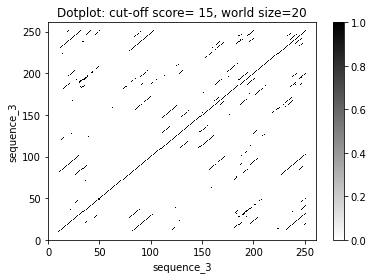

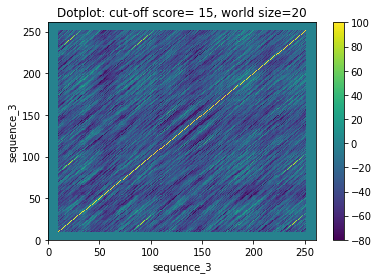

In [18]:
dotplot(sequence_3, sequence_3, cutoff=15, wordsize=20, isreversecompl=False)

This one has more significant repetitions, well visible on the heatmap. It has 3 strongly repeating parts, at 
- 80-100 and 5-25
- 225-240 and 5-20
- 225-240 and 75-90

sequence_4 :  CAGAGGCCAGTGGCATCTGACTTTGAGCAACCAGGGTCTCAGCGAAGCAGCTCGGTGGAACTCCAAGGAAACCTTCTTCCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTGTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTCCCTGGCCCCGCACCACGCAG
sequence_4 :  CAGAGGCCAGTGGCATCTGACTTTGAGCAACCAGGGTCTCAGCGAAGCAGCTCGGTGGAACTCCAAGGAAACCTTCTTCCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTGTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTCCCTGGCCCCGCACCACGCAG


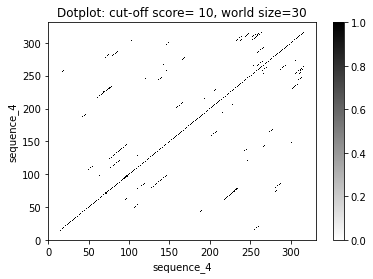

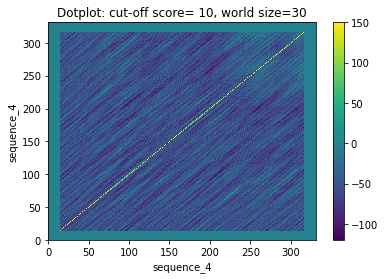

In [19]:
dotplot(sequence_4, sequence_4, cutoff=10, wordsize=30, isreversecompl=False)

Also not many repetitions, only 2 longer with about 10 nucleotides amd 4 with around 5 nucleotides. 

#### As a conclusion, I would say the 3rd sequence has only significant repetitions, at 3 regions.

### 3.: Are there any stem loop regions in the sequences? In which one(s)? (Usually nearly perfect match is required in stem loops in order to stabilise their structure.) Where are these regions? What is a stem loop?

###  3. Answer:

sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG
sequence_1 reverse complement :  CAGATACTCAGCAGCATTCCGAGATACAGGGCCATGATACCAGGAATGTTTCTCCAGGCTGTTGACGGGGGTGATGTAGTTGCTTGGGACCCATCCTTGGCCATTTTTCGTTTGGGCTTCACACCATTCCCCATTGTGATTATAACCCAAGACCCGGAGCTTTTCACCTTTAGTGATGCTGAGAGTGTTATCTCCACTGGCCACAAAATCATAGAGTGCCACAAAAAGGTTGGGGTCATTTTCACTGGGCCCAGCAAGAAGGTTTTCCTTGGAGTTCCATCGAGCTGCTTCGCTGAGACCCTGGGGCTCAAAGTCAGATGCCACTGGCCTCTGCAGGGCTTCTTCCAGGT


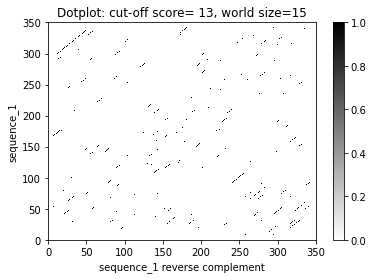

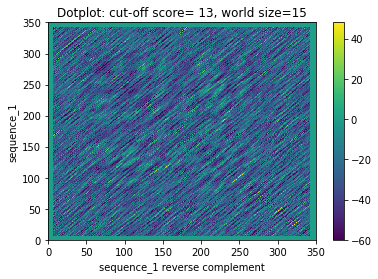

In [20]:
dotplot(sequence_1, None, cutoff=13, wordsize=15, isreversecompl=True)

sequence_2 :  AAGAAGGCCAAGCTTGCCTGCCCTGCATTTTATCAAAGGAGCAGGGAAGAAGGAATCATCGAGGCATGGGGGTCCACACTGCAATGTTTTTGTGGAACATGAAGCCCTTCAGCGGCCAGTAGCATCTGACTTTGAGCCTCAGGGTCTGAGTGAAGCCGCTCGTTGGAACTCCAAGGAAAACCTTCTCGCTGGACCCAGTGAAAATGACCCCAACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACACTCTAAGCATAACTAAAGGTGAAAAGCTCCGGGTCTTAGGCTATAATGAAGCCCAAACCAAAAATGGCCAAGGCTGGGTCCCAAGCAACTACATCACGCCAGTCAAC
sequence_2 reverse complement :  GTTGACTGGCGTGATGTAGTTGCTTGGGACCCAGCCTTGGCCATTTTTGGTTTGGGCTTCATTATAGCCTAAGACCCGGAGCTTTTCACCTTTAGTTATGCTTAGAGTGTTATCTCCACTGGCCACAAAATCATACAGTGCAACGAAAAGGTTGGGGTCATTTTCACTGGGTCCAGCGAGAAGGTTTTCCTTGGAGTTCCAACGAGCGGCTTCACTCAGACCCTGAGGCTCAAAGTCAGATGCTACTGGCCGCTGAAGGGCTTCATGTTCCACAAAAACATTGCAGTGTGGACCCCCATGCCTCGATGATTCCTTCTTCCCTGCTCCTTTGATAAAATGCAGGGCAGGCAAGCTTGGCCTTCTT


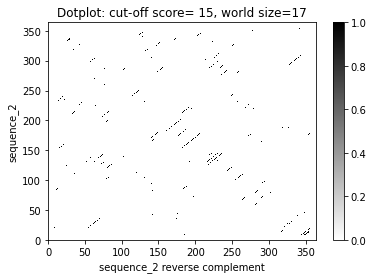

In [21]:
dotplot(sequence_2, None, cutoff=15, wordsize=17, isreversecompl=True)

sequence_3 :  AGCAGGAGAAGCGCCTTACCTGGCCCCGCAGGTCCTACTCCCCCCGGAGTTTTGAGGATTGCGGAGGCGGCTATACCCCGGACGCCTTACCTGGCCCCGCATGCAGCTCCAATGAGAACCTCACCTCCAGGGTGAGGTTCTCATTCGAGGAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTACCTGGCCCCGCACCTCGCAGAACT
sequence_3 reverse complement :  AGTTCTGCGAGGTGCGGGGCCAGGTAAGGCGAGAGCGGCTTTTGTCCCGGAACATGCGGTAGGTGGTGGGGCTTGGGGACACGCGGCTGGACTGGCCAGAGGAGAAGTCCTCCTCGAATGAGAACCTCACCCTGGAGGTGAGGTTCTCATTGGAGCTGCATGCGGGGCCAGGTAAGGCGTCCGGGGTATAGCCGCCTCCGCAATCCTCAAAACTCCGGGGGGAGTAGGACCTGCGGGGCCAGGTAAGGCGCTTCTCCTGCT


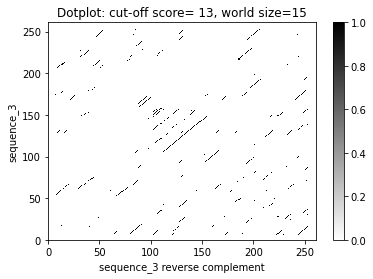

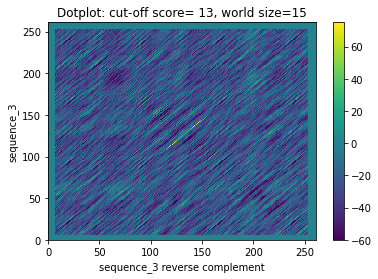

In [22]:
dotplot(sequence_3, None, cutoff=13, wordsize=15, isreversecompl=True)

sequence_4 :  CAGAGGCCAGTGGCATCTGACTTTGAGCAACCAGGGTCTCAGCGAAGCAGCTCGGTGGAACTCCAAGGAAACCTTCTTCCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTGTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTCCCTGGCCCCGCACCACGCAG
sequence_4 reverse complement :  CTGCGTGGTGCGGGGCCAGGGAAGGCGAGAGCGGCTTTTGTCCCGGAACATGCGGTAGGTGGTGGGGCTTGGGGACACGCGGCTGGACTGGCCAGAGGAGAAGTCCTGTTTGGGCTTCACACCATTCCCCATTGTGATTATAACCCAAGACCCGGAGCTTTTCACCTTTAGTGATGCTGAGAGTGTTATCTCCACTGGCCACACAATCATAGAGTGCCACAAAAAGGTTGGGGTCATTTTCACTGGGCCCAGGAAGAAGGTTTCCTTGGAGTTCCACCGAGCTGCTTCGCTGAGACCCTGGTTGCTCAAAGTCAGATGCCACTGGCCTCTG


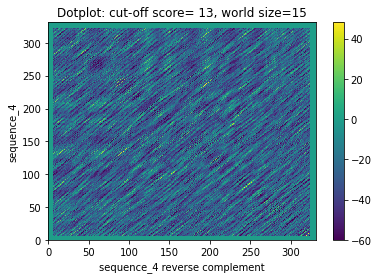

In [23]:
dotplot(sequence_4, None, cutoff=13, wordsize=15, isreversecompl=True)

In sequence 3 there is a high possibility that there is a stem loop in it, because it has a long cross diagonal line right in the center, at 110-140 with 140-170. A stem loop means that the nucleotide chain creates bonds with itself, so there must be an inverse repeat region in the sequence. This can be found with the dotplot using the isreversecompl=True parameter. In sequence 4 there is no sign of a stem loop, in sequence 2 there could be some short ones between 150 and 230, and in sequence 1 it is likely to be a stem loop between 300 and 350. 

### 4.: How is sequence_4 related to the other sequences? What could be its origin?  

###  4. Answer:

sequence_1 :  ACCTGGAAGAAGCCCTGCAGAGGCCAGTGGCATCTGACTTTGAGCCCCAGGGTCTCAGCGAAGCAGCTCGATGGAACTCCAAGGAAAACCTTCTTGCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTTTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACGAAAAATGGCCAAGGATGGGTCCCAAGCAACTACATCACCCCCGTCAACAGCCTGGAGAAACATTCCTGGTATCATGGCCCTGTATCTCGGAATGCTGCTGAGTATCTG
sequence_4 :  CAGAGGCCAGTGGCATCTGACTTTGAGCAACCAGGGTCTCAGCGAAGCAGCTCGGTGGAACTCCAAGGAAACCTTCTTCCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTGTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTCCCTGGCCCCGCACCACGCAG


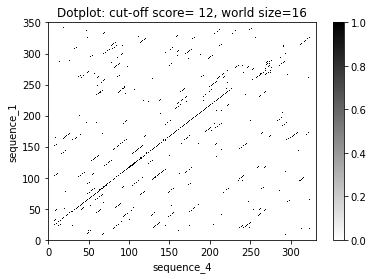

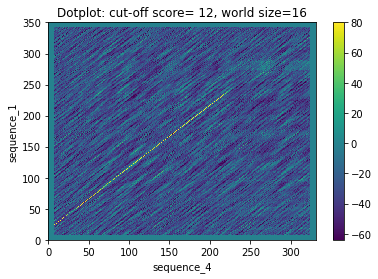

In [24]:
dotplot(sequence_1, sequence_4, cutoff=12, wordsize=16, isreversecompl=False)

sequence_2 :  AAGAAGGCCAAGCTTGCCTGCCCTGCATTTTATCAAAGGAGCAGGGAAGAAGGAATCATCGAGGCATGGGGGTCCACACTGCAATGTTTTTGTGGAACATGAAGCCCTTCAGCGGCCAGTAGCATCTGACTTTGAGCCTCAGGGTCTGAGTGAAGCCGCTCGTTGGAACTCCAAGGAAAACCTTCTCGCTGGACCCAGTGAAAATGACCCCAACCTTTTCGTTGCACTGTATGATTTTGTGGCCAGTGGAGATAACACTCTAAGCATAACTAAAGGTGAAAAGCTCCGGGTCTTAGGCTATAATGAAGCCCAAACCAAAAATGGCCAAGGCTGGGTCCCAAGCAACTACATCACGCCAGTCAAC
sequence_4 :  CAGAGGCCAGTGGCATCTGACTTTGAGCAACCAGGGTCTCAGCGAAGCAGCTCGGTGGAACTCCAAGGAAACCTTCTTCCTGGGCCCAGTGAAAATGACCCCAACCTTTTTGTGGCACTCTATGATTGTGTGGCCAGTGGAGATAACACTCTCAGCATCACTAAAGGTGAAAAGCTCCGGGTCTTGGGTTATAATCACAATGGGGAATGGTGTGAAGCCCAAACAGGACTTCTCCTCTGGCCAGTCCAGCCGCGTGTCCCCAAGCCCCACCACCTACCGCATGTTCCGGGACAAAAGCCGCTCTCGCCTTCCCTGGCCCCGCACCACGCAG


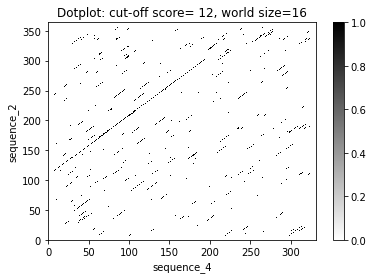

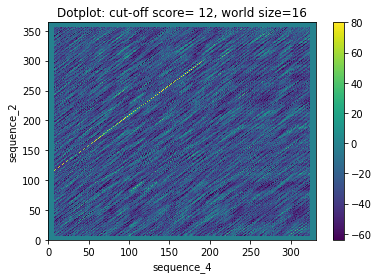

In [25]:
dotplot(sequence_2, sequence_4, cutoff=12, wordsize=16, isreversecompl=False)

Sequence 4 is really similar to sequence 1 and 2. With sequence 1 it is almost identical from 0 to 225, and this is the reason why I say it is it's origin.